In [1]:
for i in range(0:10):
    print i

SyntaxError: invalid syntax (<ipython-input-1-11646fe8eca3>, line 1)

In [ ]:
for i in range(0, 10):
    print i

In [ ]:
for i in range(0, 10):
    print (i)

In [2]:
i=i+2


NameError: name 'i' is not defined

In [3]:
i+1


NameError: name 'i' is not defined

In [11]:
i+2

4

<IPython.core.display.Javascript object>


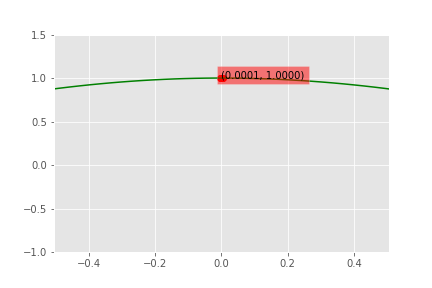

In [6]:
%matplotlib notebook
% run python/numric/exp_1.py

<IPython.core.display.Javascript object>


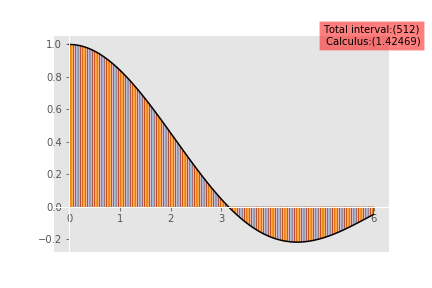

In [8]:
%matplotlib notebook
'''
@brief: 变步长复化梯形计算积分
@author: Tang
'''
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
import math

#print(plt.style.available)
plt.style.use("ggplot")
fig,ax = plt.subplots()
err = 0.00001
'''
@brief: get f(x) = sin(x)/x
'''
def func(x): 
    if(x==0):
        return 1.0
    else:
        return math.sin(x)/x
'''
@brief: 变步长复化梯形计算积分
@param err: 求解精度
'''
def calculus(err):
    n=1 #初始区间数
    a, b = 0, 6 #求积分区间[0,6]
    h = float(b-a)

    T0 =  0.5*h*(func(float(a))+func(float(b)))#积分值
    
    yield [n, T0] #传参给画图函数
    #n = n+1 这里不能加！
    T1 = 0.5*T0 + 0.5*h*func(a+h*0.5)
    yield [n*2,T1]
    
    while(math.fabs(T0-T1)>err):
        h = h*0.5
        T0 = T1
        T1 = 0
        n = n*2 #目前区间数
        for k in range(0, n):
            T1 = T1 + func(a+(k+0.5)*h)
        T1 = T0*0.5+h*T1/2
        yield [n*2,T1]
    print("计算得积分为：")
    print(T1)
    
def update(data):
    n = data[0]
    calculus = data[1]
    plt.cla()
    plt.grid(False) #不显示网格
    ax.text(5, 1, "Total interval:(%d)\n Calculus:(%.5f)" % (n,calculus) , bbox=dict(facecolor='red', alpha=0.5))
    tmpx = [0 + float(6) /100 * each for each in range(101)]
    ax.spines['bottom'].set_position(('data', 0))  #调整坐标轴位置
    ax.spines['left'].set_position(('data',0)) 
    plt.plot(tmpx, [func(each) for each in tmpx], linestyle = '-', color='black') #待积分曲线
    
    for rang in range(n):
        tmpx = [0 + float(6)/n * rang, 0 + float(6)/n * rang, 0 + float(6)/n * (rang+1), 0 + float(6)/n * (rang+1)]
        tmpy = [0, func(tmpx[1]), func(tmpx[2]), 0]
        c = ['skyblue', 'lightpink', 'orange', 'firebrick']
        plt.fill(tmpx, tmpy, color=c[rang%4])
    return
#动画
ani = animation.FuncAnimation(fig, update, frames = calculus(err), interval=1000, repeat=False)
plt.show()


In [5]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from matplotlib import rcParams
from IPython.display import HTML

fig, ax = plt.subplots()

ax.set_xlim(( 0, 2))
ax.set_ylim((-2, 2))

line, = ax.plot([], [], lw=2)

def init():
    line.set_data([], [])
    return (line,)

def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return (line,)

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, 
                               blit=True)
HTML(anim.to_html5_video())

<IPython.core.display.Javascript object>

RuntimeError: Requested MovieWriter (ffmpeg) not available

In [7]:
from IPython.display import HTML, Image
Image(url='myAnimation.gif')